___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [25]:
# set date ranges 
start = datetime.date(2006,1,1)
end = datetime.date(2016,1,1)

In [27]:
# test
f = data.DataReader('^DJI', 'stooq',start=start,end=end)

In [238]:
f

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,17590.66,17590.66,17421.16,17425.03,93689814
2015-12-30,17711.94,17714.13,17588.87,17603.87,59763701
2015-12-29,17547.37,17750.02,17547.37,17720.98,69864112
2015-12-28,17535.66,17536.90,17437.34,17528.27,59769986
2015-12-24,17593.26,17606.34,17543.95,17552.17,40352900
...,...,...,...,...,...
2006-01-09,10959.50,11020.20,10944.40,11011.90,248164661
2006-01-06,10875.50,10968.80,10875.50,10959.30,291833753
2006-01-05,10880.40,10908.20,10843.70,10882.20,250857149


In [86]:
# check min/max values of dataframe index
print(f.index.values.min())
print(f.index.values.max())

2006-01-03T00:00:00.000000000
2015-12-31T00:00:00.000000000


In [91]:
# another way to check index; not recommended 
f.reset_index()['Date'].min()

Timestamp('2006-01-03 00:00:00')

In [92]:
# get the index value for the max value in a column
f['High'].idxmax()

Timestamp('2015-05-19 00:00:00')

In [149]:
# Baank of America
BAC = data.DataReader('BAC', 'stooq',start=start,end=end)
BAC.sort_values(by='Date').head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,41.185,41.410,40.508,41.324,18565928.0
2006-01-04,41.255,41.468,40.772,40.886,20230721.0
2006-01-05,40.886,41.106,40.659,40.939,16887242.0
2006-01-06,41.078,41.175,40.686,40.877,14348537.0
2006-01-09,41.009,41.229,40.693,40.904,17794318.0


In [116]:
tick_dict = {'Bank of America':'BAC','Citigroup':'C','Goldman Sachs':'GS',
             'JPMorgan Chase':'JPM','Morgan Stanley':'MS','Wells Fargo':'WFC'}

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [115]:
tickers = [v for i,v in tick_dict.items()]
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [118]:
# loop through company and pull information
start = datetime.date(2006,1,1)
end = datetime.date(2016,1,1)

df_dict = {}

for t in tickers:
    df_dict[t] = data.DataReader(t, 'stooq',start=start,end=end)
        

In [130]:
df_dict.keys()

dict_keys(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'])

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [480]:
bank_stocks = pd.concat(df_dict.values(),keys=df_dict.keys(),axis=1)
bank_stocks

BAC                                            C           \
              Open    High     Low   Close      Volume     Open     High   
Date                                                                       
2006-01-03  41.185  41.410  40.508  41.324  18565928.0  434.680  438.020   
2006-01-04  41.255  41.468  40.772  40.886  20230721.0  433.450  435.560   
2006-01-05  40.886  41.106  40.659  40.939  16887242.0  429.690  432.710   
2006-01-06  41.078  41.175  40.686  40.877  14348537.0  433.610  433.770   
2006-01-09  41.009  41.229  40.693  40.904  17794318.0  431.110  432.350   
...            ...     ...     ...     ...         ...      ...      ...   
2015-12-24  15.696  15.753  15.607  15.651  32410322.0   46.867   47.304   
2015-12-28  15.607  15.616  15.388  15.524  46054749.0   46.945   46.945   
2015-12-29  15.634  15.726  15.554  15.658  50346511.0   47.115   47.526   
2015-12-30  15.590  15.625  15.443  15.453  38646177.0   47.188   47.277   
2015-12-31  15.417  15.470  15.252  15.252  51938092.0   46.498   46.782   

                                          ...      MS                          \
                Low    Close      Volume  ...    Open    High     Low   Close   
Date                                      ...                                   
2006-01-03  426.760  437.250   1733359.0  ...  39.739  40.653  39.435  40.527   
2006-01-04  428.880  429.160   2109140.0  ...  40.804  41.205  40.559  40.559   
2006-01-05  429.340  431.270   1279794.0  ...  40.559  40.726  40.323  40.670   
2006-01-06  427.570  431.270   1544654.0  ...  40.851  40.902  40.350  40.710   
2006-01-09  428.440  429.250   1894722.0  ...  40.749  41.213  40.741  41.136   
...             ...      ...         ...  ...     ...     ...     ...     ...   
2015-12-24   46.840   47.069   5230888.0  ...  28.782  28.907  28.666  28.703   
2015-12-28   46.401   46.774   9809976.0  ...  28.596  28.596  28.233  28.427   
2015-12-29   47.096   47.313  11370074.0  ...  28.666  28.899  28.564  28.763   
2015-12-30   46.662   46.704   9811786.0  ...  28.722  28.849  28.455  28.482   
2015-12-31   46.212   46.212  12622184.0  ...  28.197  28.543  28.074  28.111   

                          WFC                                      
               Volume    Open    High     Low   Close      Volume  
Date                                                               
2006-01-03  6421817.0  23.594  23.876  23.296  23.818  14754974.0  
2006-01-04  9527984.0  23.740  23.755  23.413  23.541  14558894.0  
2006-01-05  6900739.0  23.518  23.556  23.375  23.518  13569368.0  
2006-01-06  8228569.0  23.581  23.720  23.437  23.651  11255751.0  
2006-01-09  4949824.0  23.651  23.755  23.556  23.651   7526696.0  
...               ...     ...     ...     ...     ...         ...  
2015-12-24  3166467.0  46.507  46.609  46.287  46.380   5909095.0  
2015-12-28  6133711.0  46.151  46.346  45.832  46.263   9796830.0  
2015-12-29  7229079.0  46.625  46.830  46.525  46.778   9331403.0  
2015-12-30  5722800.0  46.761  46.795  46.358  46.439   9475484.0  
2015-12-31  9221655.0  46.120  46.490  45.872  45.992  12918098.0  

[2517 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [144]:
bank_stocks.columns.names

FrozenList([None, None])

In [145]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [146]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   41.185  41.410  40.508  41.324  18565928.0  434.68  438.02   
2006-01-04   41.255  41.468  40.772  40.886  20230721.0  433.45  435.56   
2006-01-05   40.886  41.106  40.659  40.939  16887242.0  429.69  432.71   
2006-01-06   41.078  41.175  40.686  40.877  14348537.0  433.61  433.77   
2006-01-09   41.009  41.229  40.693  40.904  17794318.0  431.11  432.35   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   426.76  437.25  1733359.0  ...  39.739  40.653  39.435  40.527   
2006-01-04   428.88  429.16  2109140.0  ...  40.804  41.205  40.559  40.559   
2006-01-05   429.34  431.27  1279794.0  ...  40.559  40.726  40.323  40.670   
2006-01-06   427.57  431.27  1544654.0  ...  40.851  40.902  40.350  40.710   
2006-01-09   428.44  429.25  1894722.0  ...  40.749  41.213  40.741  41.136   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6421817.0  23.594  23.876  23.296  23.818  14754974.0  
2006-01-04   9527984.0  23.740  23.755  23.413  23.541  14558894.0  
2006-01-05   6900739.0  23.518  23.556  23.375  23.518  13569368.0  
2006-01-06   8228569.0  23.581  23.720  23.437  23.651  11255751.0  
2006-01-09   4949824.0  23.651  23.755  23.556  23.651   7526696.0  

[5 rows x 30 columns]

In [148]:
df_dict['BAC'].sort_values(by='Date').head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,41.185,41.410,40.508,41.324,18565928.0
2006-01-04,41.255,41.468,40.772,40.886,20230721.0
2006-01-05,40.886,41.106,40.659,40.939,16887242.0
2006-01-06,41.078,41.175,40.686,40.877,14348537.0
2006-01-09,41.009,41.229,40.693,40.904,17794318.0


# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [183]:
bank_stocks.columns

MultiIndex([('BAC',   'Open'),
            ('BAC',   'High'),
            ('BAC',    'Low'),
            ('BAC',  'Close'),
            ('BAC', 'Volume'),
            (  'C',   'Open'),
            (  'C',   'High'),
            (  'C',    'Low'),
            (  'C',  'Close'),
            (  'C', 'Volume'),
            ( 'GS',   'Open'),
            ( 'GS',   'High'),
            ( 'GS',    'Low'),
            ( 'GS',  'Close'),
            ( 'GS', 'Volume'),
            ('JPM',   'Open'),
            ('JPM',   'High'),
            ('JPM',    'Low'),
            ('JPM',  'Close'),
            ('JPM', 'Volume'),
            ( 'MS',   'Open'),
            ( 'MS',   'High'),
            ( 'MS',    'Low'),
            ( 'MS',  'Close'),
            ( 'MS', 'Volume'),
            ('WFC',   'Open'),
            ('WFC',   'High'),
            ('WFC',    'Low'),
            ('WFC',  'Close'),
            ('WFC', 'Volume')],
           names=['Bank Ticker', 'Stock Info'])

In [198]:
# level can also be referenced by name, for example: Stock Info
bank_stocks.xs('Close',axis=1,level=1).max()

Bank Ticker
BAC     48.187
C      500.400
GS     212.730
JPM     60.447
MS      62.070
WFC     48.855
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [227]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2516 non-null   float64
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2513 non-null   float64
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2516 non-null   float64
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

In [271]:
bank_stocks.xs('Close',axis=1,level=1)

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,41.324,437.250,110.58,30.642,40.527,23.818
2006-01-04,40.886,429.160,109.08,30.206,40.559,23.541
2006-01-05,40.939,431.270,109.04,30.298,40.670,23.518
2006-01-06,40.877,431.270,110.55,30.512,40.710,23.651
2006-01-09,40.904,429.250,111.89,31.007,41.136,23.651
...,...,...,...,...,...,...
2015-12-24,15.651,47.069,167.47,57.860,28.703,46.380
2015-12-28,15.524,46.774,166.68,57.669,28.427,46.263
2015-12-29,15.658,47.313,168.42,58.267,28.763,46.778


In [487]:
# more efficient approach
returns = pd.DataFrame()

In [488]:
# much more efficient approach
for t in tickers:
    returns[t +' Return'] = bank_stocks[t]['Close'].pct_change()

In [489]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010599,-0.018502,-0.013565,-0.014229,0.000790,-0.011630
2006-01-05,0.001296,0.004917,-0.000367,0.003046,0.002737,-0.000977
2006-01-06,-0.001514,0.000000,0.013848,0.007063,0.000984,0.005655
2006-01-09,0.000661,-0.004684,0.012121,0.016223,0.010464,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [490]:
import seaborn as sns

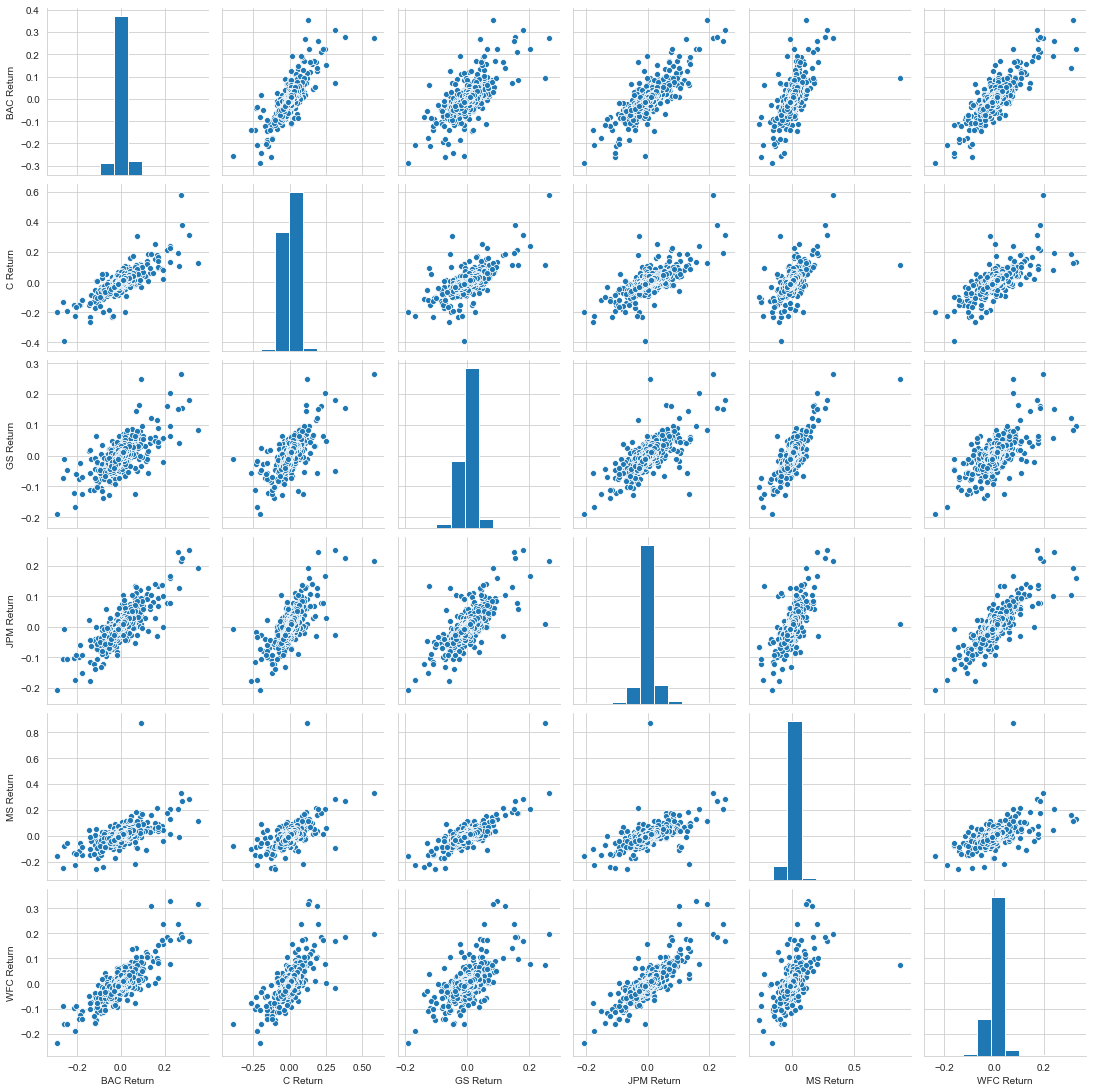

In [491]:
sns.pairplot(data=returns)

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [496]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [284]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [288]:
# all
returns.std()

BAC Return    0.036604
C Return      0.038616
GS Return     0.025369
JPM Return    0.027668
MS Return     0.037705
WFC Return    0.030221
dtype: float64

In [456]:
# 2015 using filter method
returns.filter(like='2015',axis=0).std()

BAC Return    0.016148
C Return      0.015279
GS Return     0.014026
JPM Return    0.013964
MS Return     0.016008
WFC Return    0.012549
dtype: float64

In [503]:
# with slicing
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016148
C Return      0.015279
GS Return     0.014026
JPM Return    0.013964
MS Return     0.016008
WFC Return    0.012549
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

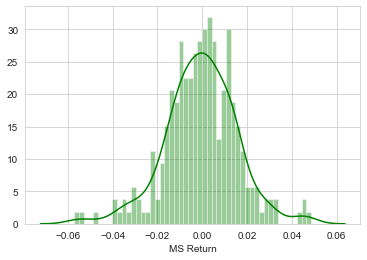

In [509]:
sns.distplot(returns['MS Return'].filter(like='2015', axis=0),bins=50, color='green')
#or
#sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],bins=50)


** Create a distplot using seaborn of the 2008 returns for CitiGroup **

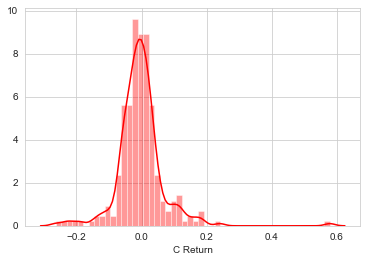

In [511]:
sns.distplot(returns['C Return'].filter(like='2008', axis=0),bins=50, color='red')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

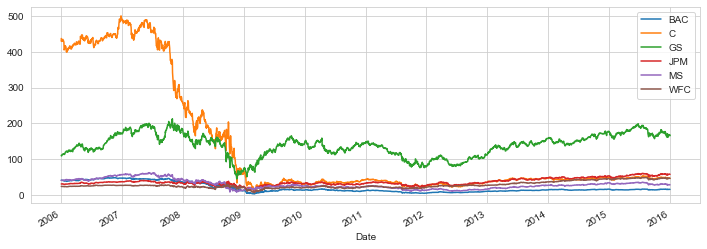

In [516]:
# method 1: loop
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

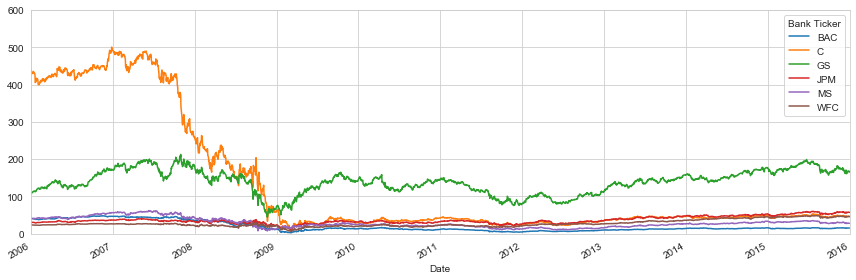

In [340]:
# method 2: using cross section; what I did 
bank_stocks.xs('Close',axis=1,level=1).plot(figsize=(12,4),xlim=('2006','2016'), ylim=(0,600))
plt.tight_layout()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [551]:
# grab close info for BAC
BAC_close = bank_stocks.xs('Close',axis=1,level=1)['BAC'].filter(like='2008',axis=0)
BAC_close.head()


Date
2008-01-02    35.600
2008-01-03    35.374
2008-01-04    34.979
2008-01-07    35.024
2008-01-08    33.717
Name: BAC, dtype: float64

In [552]:
# calc moving average
mv = bank_stocks.xs('Close',axis=1,level=1)['BAC'].filter(like='2008',axis=0).rolling(30).mean()
mv

Date
2008-01-02          NaN
2008-01-03          NaN
2008-01-04          NaN
2008-01-07          NaN
2008-01-08          NaN
                ...    
2008-12-24    12.937167
2008-12-26    12.830733
2008-12-29    12.708967
2008-12-30    12.616067
2008-12-31    12.588233
Name: BAC, Length: 253, dtype: float64

In [553]:
# combine two series objects into a dataframe
BAC_moving = pd.concat([BAC_close,mv],axis=1)
type(BAC_moving)

pandas.core.frame.DataFrame

In [554]:
# rename the column headings
BAC_moving.columns = ['BAC Close','30 Day Avg']

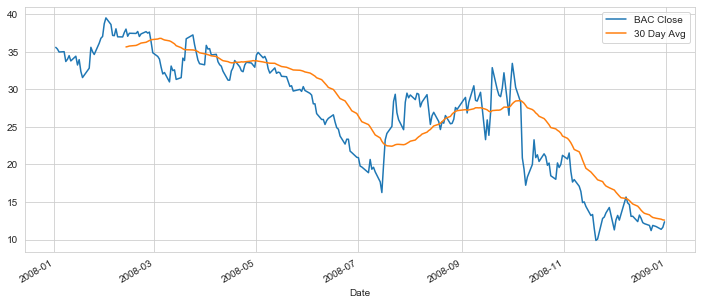

In [555]:
# plot new df
BAC_moving.plot(figsize=(12,5))

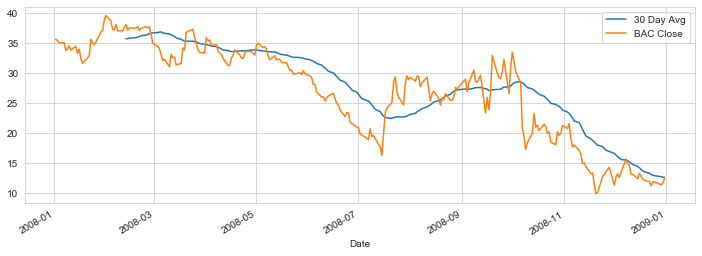

In [560]:
# better method; can also not create new objects and just plot from filtered dfs
plt.figure(figsize=(12,4))
BAC_close = bank_stocks['BAC']['Close'].filter(like='2008',axis=0).rolling(30).mean()
BAC_close.plot(label='30 Day Avg')
BAC_close2 = bank_stocks['BAC']['Close'].filter(like='2008',axis=0)
BAC_close2.plot(label='BAC Close')
plt.legend()



** Create a heatmap of the correlation between the stocks Close Price.**

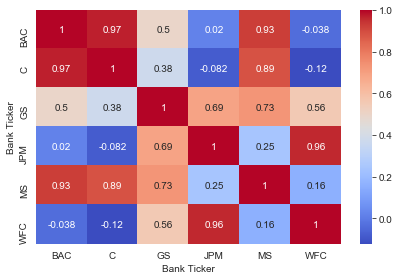

In [435]:
sns.heatmap(bank_stocks.xs('Close',axis=1,level=1).corr(),cmap='coolwarm',annot=True)
plt.tight_layout()

** Optional: Use seaborn's clustermap to cluster the correlations together:**

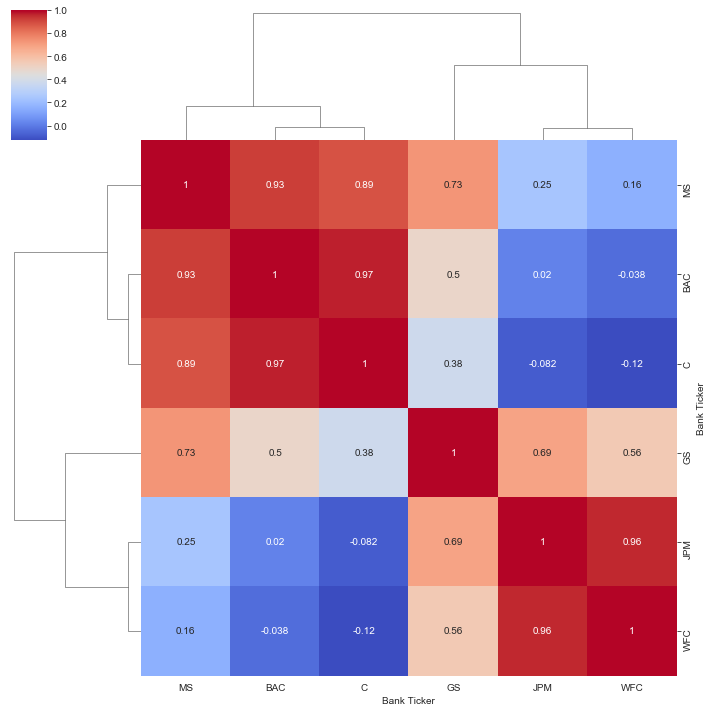

In [437]:
sns.clustermap(bank_stocks.xs('Close',axis=1,level=1).corr(),cmap='coolwarm',annot=True)


# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization operations.